# Comparación de Algoritmos para Conjunto Independiente Máximo (MIS)

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import approximation as approx

## Definición del grafo outerplanar de prueba

In [17]:
edges = [
    #(1, 2), (2, 3), (3, 4), (4, 5), (5, 1),  # ciclo externo
    #(2, 5), (3, 5)  # diagonales internas
    (1, 2),
    (7, 2),
    (3, 9),
    (3, 2),
    (7, 6),
    (5, 2),
    (1, 5),
    (2, 8),
    (10, 2),
    (1, 7),
    (6, 1),
    (6, 9),
    (8, 4),
    (9, 4),    
]

G = nx.Graph()
G.add_edges_from(edges)

## Algoritmo personalizado (Greedy + DFS)

In [18]:
def mis_outerplanar(graph):
    mis = set()
    visited = set()

    def dfs(u):
        visited.add(u)
        can_add = all(v not in mis for v in graph.neighbors(u))
        if can_add:
            mis.add(u)
        for v in graph.neighbors(u):
            if v not in visited:
                dfs(v)

    for node in graph.nodes:
        if node not in visited:
            dfs(node)

    return mis

## Ejecución y comparación de resultados

In [19]:
mis_custom = mis_outerplanar(G)
mis_networkx = approx.maximum_independent_set(G)

print("MIS aproximado (algoritmo propio):", mis_custom)
print("MIS de NetworkX:", mis_networkx)

MIS aproximado (algoritmo propio): {8, 1, 10, 9}
MIS de NetworkX: {8, 1, 10, 3}


## Visualización comparativa

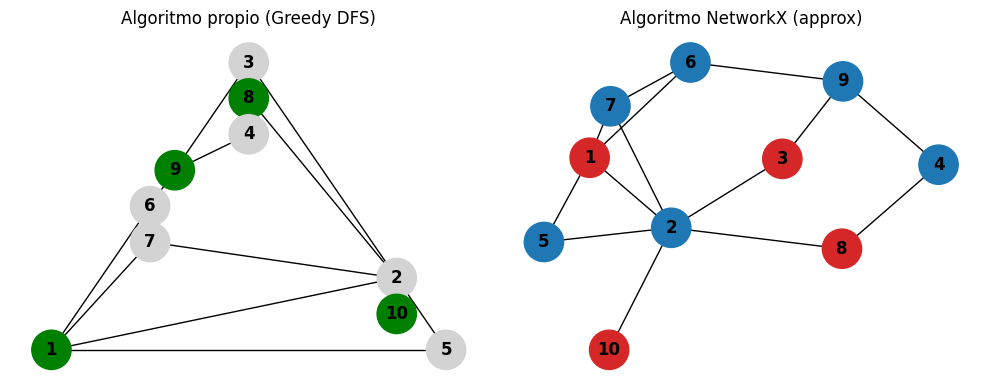

In [20]:
pos = nx.planar_layout(G)
pos2 = nx.spring_layout(G, seed=42)

# Grafo con MIS del algoritmo propio
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
nx.draw(
    G,
    pos=pos,
    with_labels=True,
    node_color=["green" if n in mis_custom else "lightgray" for n in G.nodes()],
    edge_color="black",
    node_size=800,
    font_weight="bold"
)
plt.title("Algoritmo propio (Greedy DFS)")

# Grafo con MIS de NetworkX
plt.subplot(1, 2, 2)
nx.draw(
    G,
    pos=pos2,
    with_labels=True,
    node_color=["tab:red" if n in mis_networkx else "tab:blue" for n in G.nodes()],
    edge_color="black",
    node_size=800,
    font_weight="bold"
)
plt.title("Algoritmo NetworkX (approx)")

plt.tight_layout()
plt.show()